## The Goal of this project

The goal of this report is to search the data we have inorder to get a possible answere for the Marketing department, on which of the two givven plans : 'Surf' and 'Ultimate' brings mor revanue. The purpose of this report will giv the marketing personal another tool to decide on where to invest more on edvertisment.

## The Hypotheses
Since we were asked to check which program made the more revanue , we should check the two populations that are in both programs, for the differance in the mean of the revenue of these two distinct groups.

## Import the relevent libreries
The libreries that we will need are bothe statistical and mathematical

In [1]:
import pandas as pd # this will have the tools of handaling data sets
import numpy as np  # this we will need to handal numpy series in pandas enviroment
from matplotlib import pyplot as plt # this we will need for plot display
from math import factorial # this we will need for distribution and probability of large data
from scipy.stats import norm # this we will need for sample data analysys
from scipy import stats   
from IPython.display import display_html #handaling display html style
from itertools import chain,cycle #display tools
import seaborn as sns

In [2]:
sns.set_theme(style="whitegrid") # setting a grid to boxplot

In [3]:
##New - ver 2 ##
pd.set_option ('display.max_columns', None)

In [4]:
#display class in html format.

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)
    

def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2 style="text-align: center;">{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

## Uploading the data.

The Data that was passed to us was divided into 5 diffrent data sets.
Our first goal is to look at the data and decide the right way we should merge the data so it will make it easier on us analaying the data .
First let us upload the data sets.

In [5]:
#uploading the data sets
megaline_calls_ds    = pd.read_csv('/datasets/megaline_calls.csv')
megaline_internet_ds = pd.read_csv('/datasets/megaline_internet.csv')
megaline_messages_ds = pd.read_csv('/datasets/megaline_messages.csv')
megaline_plans_ds    = pd.read_csv('/datasets/megaline_plans.csv')
megaline_users_ds    = pd.read_csv('/datasets/megaline_users.csv')


**Let us see the data each contains and see the filds that are incomone with each dataset**

In [6]:
#print the head of the megaline_calls_ds data set and its info
print(megaline_calls_ds.info())
megaline_calls_ds.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [7]:
#print the head of the megaline_messages_ds data set and its info
print(megaline_messages_ds.info())
megaline_messages_ds.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [8]:
#print the head of the megaline_internet_ds data set and its info
print(megaline_internet_ds.info())
megaline_internet_ds.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


**All the above datasets do not have missing values**

In [9]:
#print the head of the megaline_plans_ds data set
print(megaline_plans_ds.info())
megaline_plans_ds.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [10]:
#print the head of the megaline_users_ds data set
print(megaline_users_ds.info())
megaline_users_ds.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


**The megaline_plans_ds seems that has no more then 2 rows that sums up data on the two plans This will probably be relevent to us further on and will give us the data when we would like to calculate the plans for each user profits. so will leave it as is and not use it, with another table only as a genarating values to add the merged tables.**

## The data preperation for analyses

We see we have a lot of scattered information. We eill nead two data sets for comparison of the hypotheses.

**first we need to merge all tha data into one homogenic data , that we can use for our investigation**

**We already stated that the megaline_plans_ds dataset will be a table to be used to calculate the revenues based by each program terms.**

**To the othe data sets we will need to establish a merge point to gether all the data from all the data sets.**

Let us find the common columns that are in all data sets and make a list of all of them.
Then using this list we should see what methode will be the best to merge the data.

### Change Name and Data types

We will change the name, data type and date format.
The date will be now a monthly date (no days of the month).This gives us a unified date structure by which we can group all the dates to values per a month.

#### Rename and data type columns adjust

In [11]:
#change the names of the columns
megaline_calls_ds.rename(columns={'id':'call_id','call_date':'monthly_log_date'}, inplace=True)
megaline_messages_ds.rename(columns={'id':'sms_id','message_date':'monthly_log_date'},inplace=True)
megaline_internet_ds.rename(columns={'id':'con_id','session_date':'monthly_log_date'},inplace=True)

#change the datatypes
megaline_calls_ds['monthly_log_date']= pd.to_datetime(megaline_calls_ds['monthly_log_date'])
megaline_messages_ds['monthly_log_date']= pd.to_datetime(megaline_messages_ds['monthly_log_date'])
megaline_internet_ds['monthly_log_date']= pd.to_datetime(megaline_internet_ds['monthly_log_date'])

print(megaline_calls_ds.info())
print()

print(megaline_messages_ds.info())
print()

print(megaline_internet_ds.info())
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   call_id           137735 non-null  object        
 1   user_id           137735 non-null  int64         
 2   monthly_log_date  137735 non-null  datetime64[ns]
 3   duration          137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   sms_id            76051 non-null  object        
 1   user_id           76051 non-null  int64         
 2   monthly_log_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB
None

<class 'pandas.core.

#### Changing the date format from daily to a moth based date

In [12]:
#using the date time we ectract only the monthe and year of every record 
megaline_calls_ds['monthly_log_date'] = megaline_calls_ds['monthly_log_date'].dt.to_period('M')
megaline_messages_ds['monthly_log_date'] = megaline_messages_ds['monthly_log_date'].dt.to_period('M')
megaline_internet_ds['monthly_log_date'] = megaline_internet_ds['monthly_log_date'].dt.to_period('M')



### Grouping the data Before merging

**The megaline_users_ds has the users details.** 

**The megaline_plans_ds has the information on the plane itself- we will use it in the final stage of preparation. To calculate the revanue of each user per month**

**We will start by grouping and merging the first three datasets : megaline_calls_ds,megaline_internet_ds,megaline_messages_ds.**

we will merge it using the outer layer of the megaline_calls_ds dataset which is the largest one

#### Grouping the tables
**Before grouping the data - we need to change the dates to periods of monthes. That because the values we will calculate will be mothly calculations**

In [13]:

##Adding a round factor to the duration column of the calls. 
## all part of a minute (evan a second) should be round up to the neerest minute
megaline_calls_ds['duration'] = megaline_calls_ds['duration'].apply(np.ceil)

In [14]:
#group all datasets that have the user time of usage by the user- and month

megaline_calls_ds_grouped = megaline_calls_ds.groupby(by=['user_id','monthly_log_date']).agg({'duration':'sum'}).reset_index()
megaline_messages_ds_grouped = megaline_messages_ds.groupby(by=['user_id','monthly_log_date']).agg({'sms_id':'count'}).reset_index()
megaline_internet_ds_grouped = megaline_internet_ds.groupby(by=['user_id','monthly_log_date']).agg({'mb_used':'sum'}).reset_index()

print(megaline_calls_ds_grouped.head())
print(megaline_messages_ds_grouped.head())
megaline_internet_ds_grouped.head()

   user_id monthly_log_date  duration
0     1000          2018-12     124.0
1     1001          2018-08     182.0
2     1001          2018-09     315.0
3     1001          2018-10     393.0
4     1001          2018-11     426.0
   user_id monthly_log_date  sms_id
0     1000          2018-12      11
1     1001          2018-08      30
2     1001          2018-09      44
3     1001          2018-10      53
4     1001          2018-11      36


,user_id,monthly_log_date,mb_used
0,1000,2018-12,1901.47
1,1001,2018-08,6919.15
2,1001,2018-09,13314.82
3,1001,2018-10,22330.49
4,1001,2018-11,18504.30


#### Merging the first two datasets

In [15]:
#Merge the two tables of calls and massages by user_id
merge_calls_massages = pd.merge(left = megaline_calls_ds_grouped,
                                right=megaline_messages_ds_grouped, 
                                how = 'outer', on=['user_id','monthly_log_date']).fillna(0).reset_index(drop=True)

merge_calls_massages.head()

,user_id,monthly_log_date,duration,sms_id
0,1000,2018-12,124.0,11.0
1,1001,2018-08,182.0,30.0
2,1001,2018-09,315.0,44.0
3,1001,2018-10,393.0,53.0
4,1001,2018-11,426.0,36.0


#### Merge the new merged Dataframe with the third grouped dataframe

**Merge the new table with the internet table**

In [16]:
#Merge the merge_calls_massages with the internet table by user_id and month
merge_calls_massages_internet = pd.merge(left = merge_calls_massages,
                                right=megaline_internet_ds_grouped, 
                                how = 'outer', on=['user_id','monthly_log_date']).fillna(0).reset_index(drop=True)

merge_calls_massages_internet.head()

,user_id,monthly_log_date,duration,sms_id,mb_used
0,1000,2018-12,124.0,11.0,1901.47
1,1001,2018-08,182.0,30.0,6919.15
2,1001,2018-09,315.0,44.0,13314.82
3,1001,2018-10,393.0,53.0,22330.49
4,1001,2018-11,426.0,36.0,18504.30


#### Prepare the last table we merge - changing the data types of the columns

**After merging the data of the three tables that holds the information for each user calls , massages and internet surf. We need to add the values from the user data table**

First - the 'churn_date' and 'reg_date' are has the wrong DataType.

Second - we should fill the missing data in 'churn_date' to the current date so we could have an ability to create a period of eferance time to sea revenues along a time line

In [17]:
#change reg_date, churn_date datatypes
megaline_users_ds['reg_date']= pd.to_datetime(megaline_users_ds['reg_date'])
megaline_users_ds['churn_date']= pd.to_datetime(megaline_users_ds['churn_date'])

megaline_users_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


#### Merge the merge_calls_massages_internet , and the megaline_users_ds

In [18]:
#merging both tables to one that holds the key data for the revenue calculations.
merged_full_plan = pd.merge(left = merge_calls_massages_internet,
                                right=megaline_users_ds, 
                                how = 'outer', on=['user_id']).reset_index(drop=True)

#print the output
print(merged_full_plan.info())
merged_full_plan.sample(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2303 entries, 0 to 2302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           2303 non-null   int64         
 1   monthly_log_date  2293 non-null   period[M]     
 2   duration          2293 non-null   float64       
 3   sms_id            2293 non-null   float64       
 4   mb_used           2293 non-null   float64       
 5   first_name        2303 non-null   object        
 6   last_name         2303 non-null   object        
 7   age               2303 non-null   int64         
 8   city              2303 non-null   object        
 9   reg_date          2303 non-null   datetime64[ns]
 10  plan              2303 non-null   object        
 11  churn_date        160 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(2), object(4), period[M](1)
memory usage: 216.0+ KB
None


,user_id,monthly_log_date,duration,sms_id,mb_used,first_name,last_name,age,city,reg_date,plan,churn_date
2185,1483,2018-06,491.0,5.0,12991.18,Miguel,Farrell,35,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-04-25,surf,NaT
102,1028,2018-11,69.0,77.0,42952.59,Jefferey,Rasmussen,57,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-02-21,ultimate,NaT
455,1098,2018-12,445.0,98.0,28876.32,Collin,Sims,33,"Albany-Schenectady-Troy, NY MSA",2018-08-14,surf,NaT
1651,1362,2018-06,503.0,62.0,18594.87,Kenyetta,Mcknight,65,"Denver-Aurora-Lakewood, CO MSA",2018-01-18,surf,NaT
543,1117,2018-07,446.0,0.0,17769.81,Hank,Taylor,49,"Dallas-Fort Worth-Arlington, TX MSA",2018-01-24,surf,NaT
606,1132,2018-04,358.0,72.0,15651.16,Edward,Roberts,39,"San Francisco-Oakland-Berkeley, CA MSA",2018-04-14,ultimate,NaT
1109,1241,2018-12,582.0,45.0,14071.01,Lala,Walls,24,"Richmond, VA MSA",2018-08-27,surf,NaT
1855,1404,2018-08,473.0,8.0,21217.65,Paulita,Conley,33,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-16,surf,NaT
381,1081,2018-04,16.0,3.0,92.31,Grayce,Sears,44,"Dallas-Fort Worth-Arlington, TX MSA",2018-04-27,surf,NaT
268,1061,2018-05,728.0,61.0,20773.12,Maryam,Valencia,38,"Columbia, SC MSA",2018-03-08,ultimate,NaT


In [19]:
#Dropping duplicats if any
merged_full_plan.drop_duplicates(inplace=True)
merged_full_plan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 2302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           2303 non-null   int64         
 1   monthly_log_date  2293 non-null   period[M]     
 2   duration          2293 non-null   float64       
 3   sms_id            2293 non-null   float64       
 4   mb_used           2293 non-null   float64       
 5   first_name        2303 non-null   object        
 6   last_name         2303 non-null   object        
 7   age               2303 non-null   int64         
 8   city              2303 non-null   object        
 9   reg_date          2303 non-null   datetime64[ns]
 10  plan              2303 non-null   object        
 11  churn_date        160 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(2), object(4), period[M](1)
memory usage: 233.9+ KB


In [20]:
#checking for missing Values
print(len(merged_full_plan.loc[merged_full_plan['mb_used'].isnull()]))
print(len(merged_full_plan.loc[merged_full_plan['sms_id'].isnull()]))
print(len(merged_full_plan.loc[merged_full_plan['duration'].isnull()]))
print(len(merged_full_plan.loc[merged_full_plan['monthly_log_date'].isnull()]))
merged_full_plan.loc[merged_full_plan['monthly_log_date'].isnull()]


10
10
10
10


,user_id,monthly_log_date,duration,sms_id,mb_used,first_name,last_name,age,city,reg_date,plan,churn_date
2293,1025,NaT,NaN,NaN,NaN,Jess,Wilkinson,64,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-10-28,ultimate,NaT
2294,1129,NaT,NaN,NaN,NaN,Marin,Bolton,70,"Baton Rouge, LA MSA",2018-11-10,surf,2018-12-27
2295,1143,NaT,NaN,NaN,NaN,Lorina,Stevens,69,"Cincinnati, OH-KY-IN MSA",2018-10-26,surf,NaT
2296,1269,NaT,NaN,NaN,NaN,Irving,Thompson,39,"Dallas-Fort Worth-Arlington, TX MSA",2018-09-13,ultimate,2018-12-15
2297,1275,NaT,NaN,NaN,NaN,Elvie,Velazquez,33,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-29,ultimate,NaT
2298,1307,NaT,NaN,NaN,NaN,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-31,surf,NaT
2299,1319,NaT,NaN,NaN,NaN,Eliseo,Carson,21,"Colorado Springs, CO MSA",2018-06-17,surf,NaT
2300,1378,NaT,NaN,NaN,NaN,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",2018-12-17,surf,NaT
2301,1463,NaT,NaN,NaN,NaN,Dinorah,Simmons,30,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-11-27,ultimate,NaT
2302,1473,NaT,NaN,NaN,NaN,Kirk,Velez,61,"Louisville/Jefferson County, KY-IN MSA",2018-12-31,surf,NaT


**There are only 10 rows for all the missing data. It might be new users that did no have the chance to make a use of theire plan or a glitch in the data due to technical\human error.**

**Any way we can discared them and moove on with our analyses they consist less than 1%, so tis will probably will  not have a significate change** 

In [21]:
#the issing values are on the same rows for all the 4 columns missing data
merged_full_plan.dropna(axis=0, subset=['monthly_log_date','duration','sms_id','mb_used'],inplace=True)

merged_full_plan.reset_index(drop=True)

,user_id,monthly_log_date,duration,sms_id,mb_used,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,2018-12,124.0,11.0,1901.47,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,2018-08,182.0,30.0,6919.15,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1001,2018-09,315.0,44.0,13314.82,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
3,1001,2018-10,393.0,53.0,22330.49,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
4,1001,2018-11,426.0,36.0,18504.30,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1204,2018-12,0.0,78.0,36730.05,Sherly,Levy,44,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-08-20,ultimate,NaT
2289,1349,2018-10,0.0,76.0,13093.55,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,surf,NaT
2290,1349,2018-11,0.0,72.0,17128.26,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,surf,NaT
2291,1349,2018-12,0.0,61.0,13039.91,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,surf,NaT


### Adding New Columns for the calculation of the revanue of each plan

**Now that we have a full data for each user and its plans we can go on and start checkin each monthe what did each customer payed**

**The firs thing we have to do is calculate for the plan of the user, is what part does he diviate from the plan he has for each category (calls, messages, internet) and for each user create the part of data that he does not have to pay, it is part of the data that he is entitale to, and the part that is the subtraction from the sum of this category and the plan part of the category.**


#### Edding the plane objective and plan diviation columns for each category

In [22]:
megaline_plans_ds.columns

Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute',
       'plan_name'],
      dtype='object')

#define a function that will retrieve the filed in the megaline_plans_ds that holds the plan objective
#and derive from it the diviation for each category, , the payment for each diviation, 
#the total payment for this month(excluded the regular monthly payment) for each category, 
#and the total revenue for a month for each user.

-Surf plan:
  - mothly payment - 20
  - 500 monthly minutes, 50 texts, and 15 GB of data
  - payment if diviate - 1 minute =0.03  , 1 text = 0.03 , 1 GB of data= $10

-Ultimate plan:
  - Monthly charge: 70
  - 3000 monthly minutes, 1000 text messages, and 30 GB of data
  - pyment if diviate - 1 minute = 0.01  , 1 text message = 0.01 , 1 GB of data = $7

-If someone uses 1025 megabytes a month, they will be charged for 2 gigabytes.


In [23]:
def call_diff(row):
    
    plan = str(row['plan']).lower()
   
    #call diff in minuts
    call_plan_dur = int(megaline_plans_ds['minutes_included'].loc[(megaline_plans_ds['plan_name'] == plan)])
    call_diff = int(abs((call_plan_dur - int(row['duration']))))
    
    return(call_diff)

def messege_diff(row):
    
    plan = str(row['plan']).lower()
    #number of messege diviations
    messege_plan_num = int(megaline_plans_ds['messages_included'].loc[(megaline_plans_ds['plan_name'] == plan)])
    messege_diff = abs(messege_plan_num - int(row['sms_id']))
    return(messege_diff)

def web_gb(row):
    
    plan = str(row['plan']).lower()
    #number GB to be charged
    web_plan_mb = int(megaline_plans_ds['mb_per_month_included'].loc[(megaline_plans_ds['plan_name'] == plan)])
    web_diff = abs(web_plan_mb - int(row['mb_used']))
    return(web_diff)

def call_rev(row):
    
    plan = str(row['plan']).lower()
    #number GB to be charged
    call_rev = round(float(row['call_diff']) * float(megaline_plans_ds['usd_per_minute'].loc[(megaline_plans_ds['plan_name'] == plan)]))
    return(call_rev)

def msg_rev(row):
    
    plan = str(row['plan']).lower()
    #number GB to be charged
    msg_rev = round(float(row['messege_diff']) * float(megaline_plans_ds['usd_per_message'].loc[(megaline_plans_ds['plan_name'] == plan)]))
    return(msg_rev)

def web_rev(row):
    
    
    plan = str(row['plan']).lower()
    web_plan_mb = int(megaline_plans_ds['mb_per_month_included'].loc[(megaline_plans_ds['plan_name'] == plan)])
    #number GB to be charged
    if (row['web_gb'] % 1024) !=0 and  int(row['mb_used']) > web_plan_mb:
        web_gb = (row['web_gb'] // 1024) + 1
    elif (row['web_gb'] % 1024) !=0 and  int(row['mb_used']) < web_plan_mb:
        web_gb = (row['web_gb'] // 1024) + 1
    elif (row['web_gb'] % 1024) ==0 :
        web_gb = (row['web_gb'] // 1024)
    
    web_rev = int(web_gb) * int(megaline_plans_ds['usd_per_gb'].loc[(megaline_plans_ds['plan_name'] == plan)])

    return(web_rev)

def plan_mothly(row):
    
    plan = str(row['plan']).lower()
    #number GB to be charged
    plan_mothly_pay = int(megaline_plans_ds['usd_monthly_pay'].loc[(megaline_plans_ds['plan_name'] == plan)]) 
    
    return(plan_mothly_pay)

def total_dif_rev(row):
    
    #total_dif_rev
    call_rev =int(float(str(row['call_rev'])))
    msg_rev =int(float(str(row['msg_rev'])))
    web_rev =row['web_rev']
    web_rev =int(web_rev)
    

    total_dif_rev = call_rev + msg_rev+ web_rev
    
    return(total_dif_rev)

def total_payment(row):
    
    plan = str(row['plan']).lower()
    #total_payment to be charged
    total_payment = round(row['total_dif_rev'] + row['msg_rev'] + float(row['web_rev']))
    total_payment = int(total_payment)
    return(total_payment)
    


In [25]:
#Edding the columns we need for the investigation
merged_full_plan['call_diff'] = merged_full_plan.apply(call_diff , axis=1)
merged_full_plan['messege_diff']= merged_full_plan.apply(messege_diff, axis=1)
merged_full_plan['web_gb'] = merged_full_plan.apply(web_gb , axis=1)
merged_full_plan['call_rev'] = merged_full_plan.apply(call_rev , axis=1)
merged_full_plan['msg_rev'] = merged_full_plan.apply(msg_rev , axis=1)
merged_full_plan['web_rev'] = merged_full_plan.apply(web_rev , axis=1)
merged_full_plan['plan_mothly'] = merged_full_plan.apply(plan_mothly , axis=1)
merged_full_plan['total_dif_rev'] = merged_full_plan.apply(total_dif_rev , axis=1)
merged_full_plan['total_payment'] = merged_full_plan.apply(total_payment , axis=1)


In [26]:
#with a sample we will chack the new values
merged_full_plan.head()

,user_id,monthly_log_date,duration,sms_id,mb_used,first_name,last_name,age,city,reg_date,plan,churn_date,call_diff,messege_diff,web_gb,call_rev,msg_rev,web_rev,plan_mothly,total_dif_rev,total_payment
0,1000,2018-12,124.0,11.0,1901.47,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,2876,989,28819,29,10,203,70,242,455
1,1001,2018-08,182.0,30.0,6919.15,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,318,20,8441,10,1,90,20,101,192
2,1001,2018-09,315.0,44.0,13314.82,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,185,6,2046,6,0,20,20,26,46
3,1001,2018-10,393.0,53.0,22330.49,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,107,3,6970,3,0,70,20,73,143
4,1001,2018-11,426.0,36.0,18504.30,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,74,14,3144,2,0,40,20,42,82


### Devide the dataset to two population dataset 

**devide the populstions to two groups by theire comunication plan**

In [27]:
#New dta set for the Surf plan population
surf_plan = merged_full_plan[merged_full_plan['plan']=='surf']

#new data set for the Ultimate population
ultimate_plan = merged_full_plan[merged_full_plan['plan']=='ultimate']

In [28]:
display_side_by_side(surf_plan.head(),ultimate_plan.head(),titles=['Surf','Ultimate'])


,user_id,monthly_log_date,duration,sms_id,mb_used,first_name,last_name,age,city,reg_date,plan,churn_date,call_diff,messege_diff,web_gb,call_rev,msg_rev,web_rev,plan_mothly,total_dif_rev,total_payment
1,1001,2018-08,182.0,30.0,6919.15,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,318,20,8441,10,1,90,20,101,192
2,1001,2018-09,315.0,44.0,13314.82,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,185,6,2046,6,0,20,20,26,46
3,1001,2018-10,393.0,53.0,22330.49,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,107,3,6970,3,0,70,20,73,143
4,1001,2018-11,426.0,36.0,18504.30,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,74,14,3144,2,0,40,20,42,82
5,1001,2018-12,412.0,44.0,19369.18,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,88,6,4009,3,0,40,20,43,83
,user_id,monthly_log_date,duration,sms_id,mb_used,first_name,last_name,age,city,reg_date,plan,churn_date,call_diff,messege_diff,web_gb,call_rev,msg_rev,web_rev,plan_mothly,total_dif_rev,total_payment
0,1000,2018-12,124.0,11.0,1901.47,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,2876,989,28819,29,10,203,70,242,455
19,1006,2018-11,10.0,15.0,2068.37,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,2990,985,28652,30,10,196,70,236,442
20,1006,2018-12,59.0,139.0,32118.82,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,2941,861,1398,29,9,14,70,52,75
26,1008,2018-10,476.0,21.0,17106.99,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT,2524,979,13614,25,10,98,70,133,241


## Start Our Mnipulation and analyses of the data

**The data is a sample of the vast data that we were givven so we will treat it as one**


### Find the mean and median for each user in the generagl dara nad in the unique plan data

In [29]:
surf_plan_describe = surf_plan.describe().T.astype(int)
ultimate_plan_describe = ultimate_plan.describe().T.astype(int)
merged_full_plan_describe = merged_full_plan.describe().T.astype(int)
display_side_by_side(surf_plan_describe,ultimate_plan_describe,merged_full_plan_describe,titles=['Surf','Ultimate','General'])

,count,mean,std,min,25%,50%,75%,max
user_id,1573,1242,139,1001,1120,1245,1358,1499
duration,1573,428,234,0,272,425,576,1510
sms_id,1573,31,33,0,3,24,47,266
mb_used,1573,16558,8013,0,11986,16829,20999,70931
age,1573,44,16,18,29,45,59,75
call_diff,1573,194,149,0,76,158,288,1010
messege_diff,1573,32,20,0,17,33,50,216
web_gb,1573,6096,5335,31,2162,4829,8601,55571
call_rev,1573,5,4,0,2,5,9,30
msg_rev,1573,1,0,0,1,1,2,6


### Ploting a Histogram for the populations

#### The General population Behaviour

**Let us look how it is destributed amoung the whole population for looking at the mean and median of our general public tendancies**

**That from each of the plans categories usage(calls,massegese,web)**

In [30]:
#Extracting the general data for the three plans parameters
general_temp_calls = merged_full_plan.groupby('user_id')['duration'].agg(Mean_call='mean').sort_values(by='Mean_call').reset_index()
general_temp_sms = merged_full_plan.groupby('user_id')['sms_id'].agg(Mean_msg='mean').sort_values(by='Mean_msg').reset_index()
general_temp_web = merged_full_plan.groupby('user_id')['web_gb'].agg(Mean_mb='mean').sort_values(by='Mean_mb').reset_index()

display_side_by_side(general_temp_calls,general_temp_sms,general_temp_web,titles=['calls','sms','web'])


,user_id,Mean_call
0,1108,0.000000
1,1089,0.000000
2,1121,0.000000
3,1131,0.000000
4,1080,0.000000
5,1137,0.000000
6,1349,0.000000
7,1194,0.000000
8,1204,0.000000
9,1306,6.000000


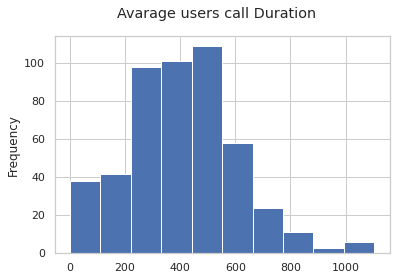

In [31]:

general_temp_calls['Mean_call'].plot(kind='hist',subplots=True,sharex=True,sharey=True,title='Avarage users call Duration')
plt.show()

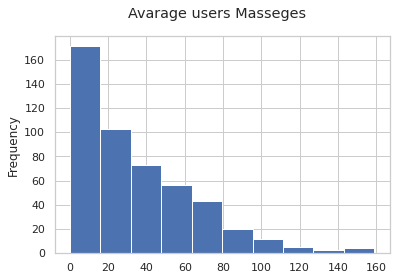

In [33]:

general_temp_sms['Mean_msg'].plot(kind='hist',subplots=True,sharex=True,sharey=True,title='Avarage users Masseges')
plt.show()

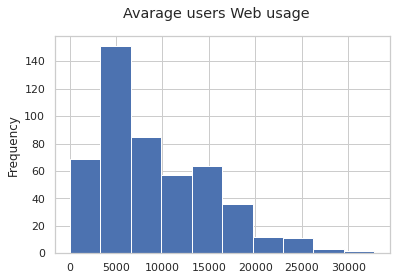

In [35]:

general_temp_web['Mean_mb'].plot(kind='hist',subplots=True,sharex=True,sharey=True,title='Avarage users Web usage')
plt.show()

##### Intermediate conclusion for the general public
Frome the graphes it seems that we have the sms and web data, heavely skwed positevly to the right.
While most users in the general population , as far as phonecals are very close to being in a normal distribution,(ranging from 200 to about 400 minutes a month), yet there are some users that speeks more then others significly which give us a littele skew to the right where most outlires probably.(over 700-1000 minutes per user).

On the massages side we can see taht there are definatly oultliers and most of the users are not tendind to use this servise much in the general data(from 0 to 60 masages per month). But there are those that take it as a tool and use it more, a fact that gives us a positive skewed graph.(up to almost 160 massages per month)

On the wed services we can see that there are definatly oultliers , those that take a use of it with much higher frequancy then the rest of the general public, a fact that gives us a positive skewed graph.(between 17000 MB and up to almos 36000 MB per month). Yet we can see that even with thes outlieres , most of the general users tendind to use this servise frequantly (where most use 2500 MB to 15000 MB per month).

**Let us explore thes factores in each separate plan per user.**

#### The distribution of the data in the Surf plan users

##### The part of the Surf plan Population from the General Population

In [37]:
#The part of the surf paln from the gerneralpopulatio
print ('The part of the Surf Plan population from  the general is :{:.2%}'.format(len(surf_plan)/len(merged_full_plan)))
print ('The part of the Surf Plan population Call revenu from  the general is :{:.2%}'.format((surf_plan['call_rev'].sum())/(merged_full_plan['call_rev'].sum())))
print ('The part of the Surf Plan population SMS revenue from  the general is :{:.2%}'.format((surf_plan['msg_rev'].sum())/(merged_full_plan['msg_rev'].sum())))
print ('The part of the Surf Plan population WEB revenue from  the general is :{:.2%}'.format((surf_plan['web_rev'].sum())/(merged_full_plan['web_rev'].sum())))
print ('The part of the Surf Plan population Total Diff revenue from  the general is :{:.2%}'.format((surf_plan['total_dif_rev'].sum())/(merged_full_plan['total_dif_rev'].sum())))
print ('The part of the Surf Plan population Total revenue from  the general is :{:.2%}'.format((surf_plan['total_payment'].sum())/(merged_full_plan['total_payment'].sum())))

The part of the Surf Plan population from  the general is :68.60%
The part of the Surf Plan population Call revenu from  the general is :33.10%
The part of the Surf Plan population SMS revenue from  the general is :19.17%
The part of the Surf Plan population WEB revenue from  the general is :58.55%
The part of the Surf Plan population Total Diff revenue from  the general is :53.58%
The part of the Surf Plan population Total revenue from  the general is :55.03%


In [38]:
#extracting the data per user from the Surf plan
surf_plan_temp_calls = surf_plan.groupby('user_id')['duration'].agg(Mean_call='mean').sort_values(by='Mean_call').reset_index()
surf_plan_sms = surf_plan.groupby('user_id')['sms_id'].agg(Mean_msg='mean').sort_values(by='Mean_msg').reset_index()
surf_plan_web = surf_plan.groupby('user_id')['web_gb'].agg(Mean_mb='mean').sort_values(by='Mean_mb').reset_index()

display_side_by_side(surf_plan_temp_calls.head(50),surf_plan_sms.head(50),surf_plan_web.head(50),titles=['calls','sms','web'])


,user_id,Mean_call
0,1194,0.000000
1,1080,0.000000
2,1089,0.000000
3,1349,0.000000
4,1131,0.000000
5,1137,0.000000
6,1121,0.000000
7,1306,6.000000
8,1034,7.000000
9,1339,23.750000


#### Ploting Histogram per category by user

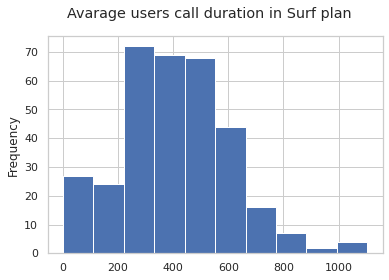

In [39]:


surf_plan_temp_calls['Mean_call'].plot(kind='hist',subplots=True,sharex=True,sharey=True,title='Avarage users call duration in Surf plan')
plt.show()

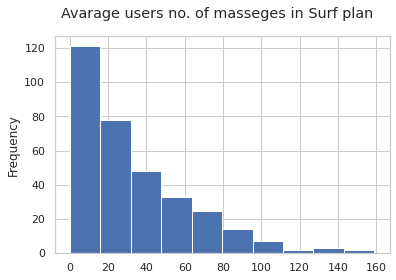

In [41]:


surf_plan_sms['Mean_msg'].plot(kind='hist',subplots=True,sharex=True,sharey=True,title='Avarage users no. of masseges in Surf plan')
plt.show()

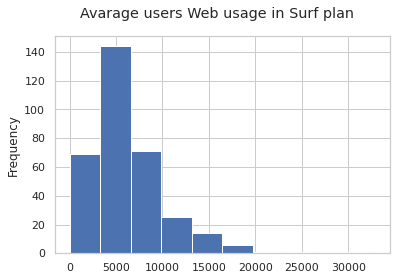

In [43]:


surf_plan_web['Mean_mb'].plot(kind='hist',subplots=True,sharex=True,sharey=True,title='Avarage users Web usage in Surf plan')
plt.show()

##### Intermidiate conclusion for the Surf Plan population

Frome the graphes it seems that we have the same sms and web data, skwed positevly to the right. That would be considred logical since this population consst 68% of the population we are chcking there for its influance on the dat is significant.
like in the general population most users in the Surf plan population ,the phone calls users tnd to spread very close to normal distribution,(ranging from 200 to about 600 minutes a month), yet there are some users that speeks more then others significly which give us a littele skew to the right where most outlires probably.(over 700-1000 minutes per user).

On the massages side we can see taht there are definatly oultliers and most of the users are not tending to use this servise much like in the general data(from 0 to 60 masages per month). and there are those that take it as a tool and use it more, a fact that gives us a positive skewed graph.(up to almost 160 massages per month)

On the wed services we can see that there are definatly oultliers , those that take a use of it with much higher frequancy then the rest of the Surf public, a fact that gives us a positive skewed graph.(between 15000 MB and up to almos 36000 MB per month). Yet we can see that even with thes outlieres , most of the Surf plan users tendind to use this servise frequantly (where most use 2500 MB to 10000 MB per month).


#### The distribution of the data in the Ultimate Plan users

In [45]:
#The part of the surf paln from the gerneralpopulatio
print ('The part of the Ultimate Plan population from  the general is :{:.2%}'.format(len(ultimate_plan)/len(merged_full_plan)))
print ('The part of the Ultimate Plan population Call revenu from  the general is :{:.2%}'.format((ultimate_plan['call_rev'].sum())/(merged_full_plan['call_rev'].sum())))
print ('The part of the Ultimate Plan population SMS revenue from  the general is :{:.2%}'.format((ultimate_plan['msg_rev'].sum())/(merged_full_plan['msg_rev'].sum())))
print ('The part of the Ultimate Plan population WEB revenue from  the general is :{:.2%}'.format((ultimate_plan['web_rev'].sum())/(merged_full_plan['web_rev'].sum())))
print ('The part of the Surf Plan population Total diff revenue from  the general is :{:.2%}'.format((ultimate_plan['total_dif_rev'].sum())/(merged_full_plan['total_dif_rev'].sum())))
print ('The part of the Surf Plan population Total revenue from  the general is :{:.2%}'.format((ultimate_plan['total_payment'].sum())/(merged_full_plan['total_payment'].sum())))

The part of the Ultimate Plan population from  the general is :31.40%
The part of the Ultimate Plan population Call revenu from  the general is :66.90%
The part of the Ultimate Plan population SMS revenue from  the general is :80.83%
The part of the Ultimate Plan population WEB revenue from  the general is :41.45%
The part of the Surf Plan population Total diff revenue from  the general is :46.42%
The part of the Surf Plan population Total revenue from  the general is :44.97%


In [46]:
#extracting the data per user from the ultimate plan
ultimate_plan_calls = ultimate_plan.groupby('user_id')['duration'].agg(Mean_call='mean').sort_values(by='Mean_call').reset_index()
ultimate_plan_sms = ultimate_plan.groupby('user_id')['sms_id'].agg(Mean_msg='mean').sort_values(by='Mean_msg').reset_index()
ultimate_plan_web = ultimate_plan.groupby('user_id')['web_gb'].agg(Mean_mb='mean').sort_values(by='Mean_mb').reset_index()

display_side_by_side(ultimate_plan_calls.head(50),ultimate_plan_sms.head(50),ultimate_plan_web.head(50),titles=['calls','sms','web'])


,user_id,Mean_call
0,1204,0.000000
1,1108,0.000000
2,1104,11.000000
3,1006,34.500000
4,1028,47.727273
5,1128,54.000000
6,1063,83.500000
7,1186,91.000000
8,1407,100.000000
9,1351,102.333333


#### Ploting Histogram per category by user

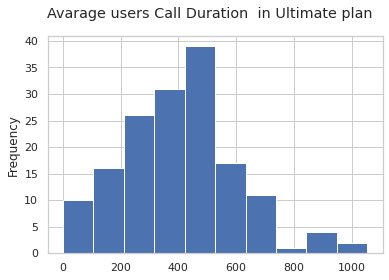

In [47]:


ultimate_plan_calls['Mean_call'].plot(kind='hist',subplots=True,sharex=True,sharey=True,title='Avarage users Call Duration  in Ultimate plan')
plt.show()

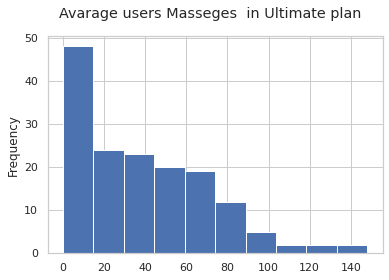

In [49]:

ultimate_plan_sms['Mean_msg'].plot(kind='hist',subplots=True,sharex=True,sharey=True,title='Avarage users Masseges  in Ultimate plan')
plt.show()

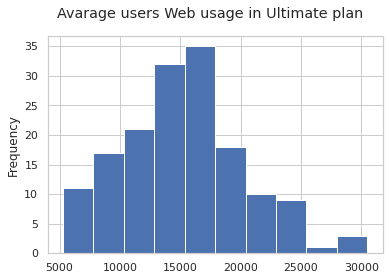

In [51]:

ultimate_plan_web['Mean_mb'].plot(kind='hist',subplots=True,sharex=True,sharey=True,title='Avarage users Web usage in Ultimate plan')
plt.show()

##### Intermidiate conclusion for the Ultimate Plan population

Frome the graphes it seems that we have a change in the web usage of the population in contrast to the surf plan users.
like in the surf plan population most users in the Ultimate plan population ,the phone calls users tend to spread very close to normal distribution,(ranging from 200 to about 600 minutes a month), yet there are some users that speeks more then others significly which give us a littele skew to the right where most outlires probably.(over 700-1000 minutes per user).

On the massages side we can see taht there are definatly oultliers and most of the users are not tending to use this servise much like in the general data(from 0 to 60 masages per month). and there are those that take it as a tool and use it more, a fact that gives us a positive skewed graph.(up to almost 160 massages per month)

On the wed services we can see that there no negative outlieres . and mean of the distribution is about 15000 MB with the Max of over 30,000 MB ,unlike the Surf population, here the distribution is almis normal though the edges are thin on the right side, a fact that gives us a positive skewed graph.

But, even with the similarities between this group and the surfe group , this groupp is responsible to most of the revenue from calls and masseges. 

#### Deferencess of  bothe groups  - general revanue including the Base payment of the program. 

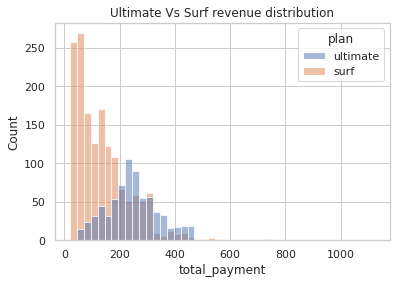

In [53]:


sns.histplot(merged_full_plan,x='total_payment',hue='plan').set(title='Ultimate Vs Surf revenue distribution')
plt.show()

##### The diferences between the two groups reveue - without the Base paymant, only the diverstion payment

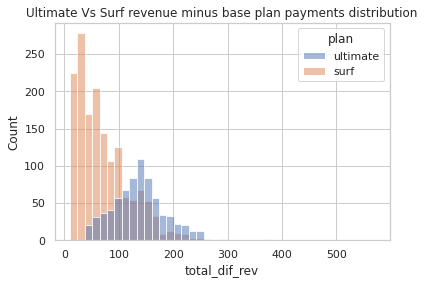

In [55]:

sns.histplot(merged_full_plan,x='total_dif_rev',hue='plan').set(title='Ultimate Vs Surf revenue minus base plan payments distribution')
plt.show()

**We see that with or without the basic payment of the program ,the Ultimate plan revenue is much higher then this of the Surf plan.
The mean of the Ultimate is much more centered around the 150 per user(without calculating the base payment) , and the Surf mean is around the 20 (without calculating the base payment).**

**When we calculate both revenues with the base payment, Ultimate mean is at almost 250 , and the Surf is around 50-75.**

#### The data variance of the profit 

**we saw that with or without the base payment the revenue from the Ultimate plan is the highest.Further more, The distribution of the revenue is closer to standart then that of the Surf plan users.**

**The co-variance will give us a mesure of how the profit veries in each group. That will get us more closer to answere , which prepaid program brings more profit.**

In [57]:
#co-variance of the profit in the general data
merged_full_plan['total_payment'].std()/merged_full_plan['total_payment'].mean()

0.6607383104197263

In [58]:
#standard deviation of profit in the general population
merged_full_plan['total_payment'].std()

113.10295366167723

In [59]:
#Mean of profit in the general population
merged_full_plan['total_payment'].mean()

171.17662450937635

**The Mean for the general population anf co variance are with small difference in change between the general population, But we know the the Surf group has positive skew, that take thes values and place them closer to the general mean**

**Let us see the covariance of bothe groups together**

In [60]:
#finding the co-variance of bothe plans
merged_full_plan.groupby(['plan'])['total_payment'].std()/merged_full_plan.groupby(['plan'])['total_payment'].mean()

plan
surf        0.767425
ultimate    0.376253
Name: total_payment, dtype: float64

##### The variance of the total profit

**When checking the co-variance of both groupse (compared to the general population), we see that the profit veries little , but with the Ultimate groupe it is much closer to the Mean for each user , where as for the Surf group , it veries more, but yet it is not a wide veriation.**

**This is another point that support the data we have that the Ultimate group generates more profit then the Surf group.**

### Box ploting for both groups , as another measure of profit distreburtion

**Lets see all the above in a box plote graph**

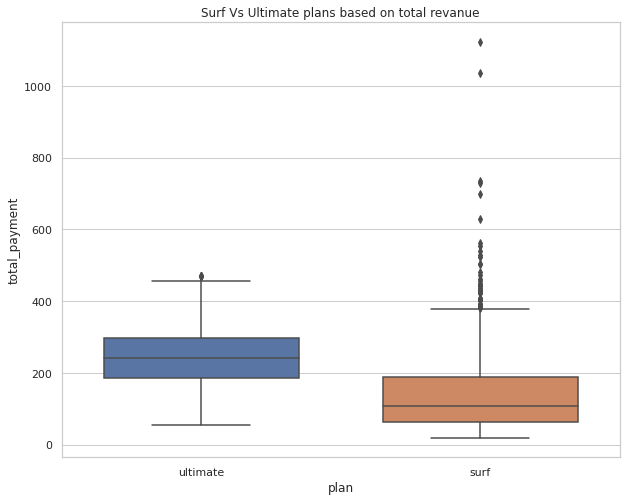

In [61]:
#Box plot for the general data
fig, ax = plt.subplots(figsize=(10,8))

## New Ver 2 ##
sns.boxplot(x='plan',  y='total_payment',
                 data=merged_full_plan ,width = 0.7 ,
           ).set_title('Surf Vs Ultimate plans based on total revanue')
plt.show()

##Old ver 1##
#sns.boxplot(x='plan',  y='total_payment',
#                 data=merged_full_plan ,width = 0.7 ,
#           )

#### Intermediate conclusion based on our data ploting

**We see that the plots shows a significant diffrance in the total revanue of bothe groups.**

**in the boxplot we can clearly see that the distribution of the Ultimate plan group , pays in avarage more then 200, and the avarage of the Surf plan is about 100. both are very close to a normal distribution and the avarage from Surf group can be very close to reality, even with the outliers**

### Ploting an avarage revenue for NY and NJ areas

**That part is to see if there are different usege for differend areas**

#### Grouping users with from both of thease areas to one table

In [62]:
#define a func to extract the area from the address we have 
def cov_to_str(str_cov):
    
    pos = str(str_cov)
    return(pos)

def return_area(row):
    
    st_lst = cov_to_str(row['city'])
    lst_st = st_lst.split()
    lst1 = ''.join(lst_st[-2:][0]) #return the 2 letter area
    if ('NY'in lst1) or ('NJ' in lst1):
        return('NY-NJ')
    else:
        return('other')
    
#creating the region column
merged_full_plan['region']= merged_full_plan.apply(return_area , axis=1)

#### The Ploting of the two groups

In [63]:
merged_full_plan.groupby('region')['total_payment'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
NY-NJ,488.0,153.456967,102.745245,20.0,66.0,130.0,223.0,529.0
other,1805.0,175.967313,115.303978,21.0,83.0,161.0,253.0,1122.0


#### Ploting the values

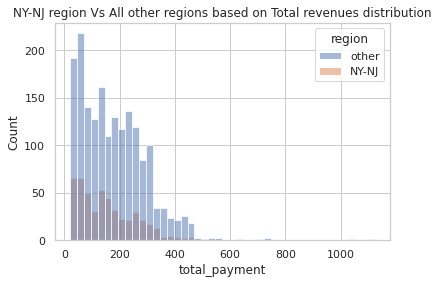

In [64]:
## New ver 2 ##

sns.histplot(merged_full_plan,x='total_payment',hue='region').set(title='NY-NJ region Vs All other regions based on Total revenues distribution')
plt.show()

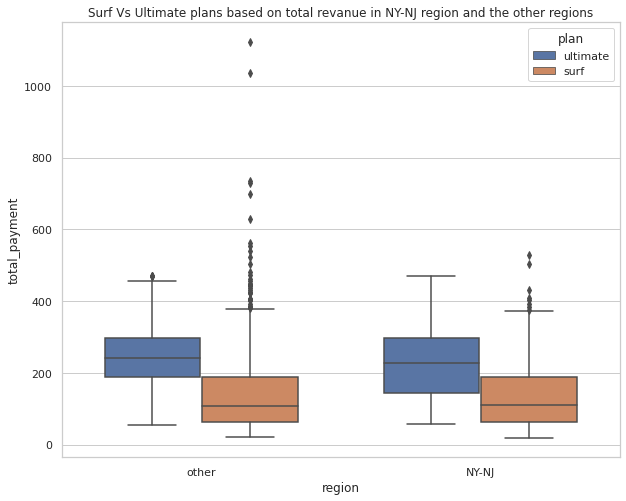

In [66]:
#Box plot for both groups of region
fig, ax = plt.subplots(figsize=(10,8))


sns.boxplot(x='region',  y='total_payment', hue ='plan',
                 data = merged_full_plan ,width = 0.7 ,
           ).set_title('Surf Vs Ultimate plans based on total revanue in NY-NJ region and the other regions')
plt.show()


In [67]:
#finding the co-variance of bothe plans
merged_full_plan.groupby(['region','plan'])['total_payment'].std()/merged_full_plan.groupby(['region','plan'])['total_payment'].mean()

region  plan    
NY-NJ   surf        0.698669
        ultimate    0.439310
other   surf        0.787708
        ultimate    0.366282
Name: total_payment, dtype: float64

#### Intermediate conclusion
**By Looking at the diffrent area groups, I can se consistancy with what we already whitnest and it is that there is no significant change between the area, the means are quit the same for both plans and the behaviuor of the population in both regions resamble.**

**The co-variance of the regions did not show apparent change in there is not much varience change and in both groups , thoghe we see outliers that skews the data, theire influance on the variace is minor.**

## The hypotheses

**### New Ver 2**

### Does the cahnge of a plane changes the mean of the total payment?
**The Data directs us to the Ultimate plan as the favorit one for being the most profitable of both plans.**

**H0 Hypotheses states :**

**The reigon will not effect the mean - The mean of revenue in NY-NJ will differ a little from all other regions**

**H1 Hypotheses states :** 

**There is an effect of the region on the avarage revenue - The mean in NY-NJ will differ significally from the mean of the other regions.**

### Gether the relevent data from the general data

In [68]:
Hyp_data_plan = merged_full_plan[['user_id','monthly_log_date','plan','total_dif_rev','total_payment']]

#### Plot the data by plans and total pay for a user

**The question is if there is an extra profit in one plane against the other. For this we will need the difference between the total payment , and the base price of the plan**



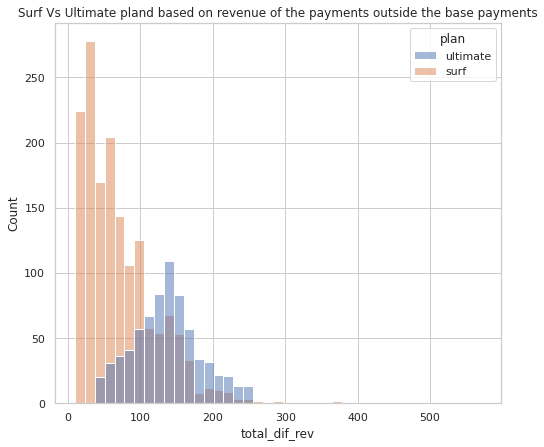

In [69]:


fig, ax = plt.subplots(figsize=(8,7))
ax = sns.histplot(Hyp_data_plan, x='total_dif_rev', hue='plan').set_title('Surf Vs Ultimate pland based on revenue of the payments outside the base payments')
plt.show()

#### Prepare the data sets

1- separate the two plans into different datasets

2 - we need two samples that are the same size for our check bsed on the "exrta-money" each plane brings.
rhat mean we need to 

3 - The skew of the Surf plan will not let us do the comparison fairly , we will need to get rid of the tail we have in the Surf population befor comtinue.

4 - put the hypotheses to the test

In [71]:
#splitting the data
Hyp_data_plan_ultimate = Hyp_data_plan[Hyp_data_plan['plan']=='ultimate']
Hyp_data_plan_Surf = Hyp_data_plan[Hyp_data_plan['plan']=='surf']

In [72]:
Hyp_data_plan_ultimate['total_payment']

0       455
19      442
20       75
26      241
27      144
       ... 
2231    269
2247    327
2287    190
2288    132
2292    470
Name: total_payment, Length: 720, dtype: int64

In [73]:
#getting rid of the tail in Surf plan
Hyp_data_plan_Surf = Hyp_data_plan_Surf.loc[(Hyp_data_plan_Surf['total_payment'] < 200)]

In [74]:
#Preparing the samples
print(len(Hyp_data_plan_ultimate))
print(len(Hyp_data_plan_Surf))

720
1229


In [75]:
#preparing a sample that will represnt the data
Hyp_data_plan_ultimate_sample = Hyp_data_plan_ultimate['total_payment'].sample(500)
Hyp_data_plan_Surf_sample = Hyp_data_plan_Surf['total_payment'].sample(500)

### Check the statistics
**Since we have indipendent values , and since the data we checked earliere have a low variance for both, the alpha we are checking for the Null hypotheses will be alpha = 0.05 **

**Both of the values are related because the chack is what will happan to the total_dif_rev if we move from surf plan to ultimate and vers versa**

**anything less then that will debunk the theory**


**New Ver 3**
#### Prepare datasets for the Tests( general data and separated data)


In [77]:

#deviding the full data btween NY area and all others
merged_full_plan_NY = merged_full_plan[merged_full_plan['city'].str.contains("NY-NJ")]['total_payment']
merged_full_plan_Others = merged_full_plan[~merged_full_plan['city'].str.contains("NY-NJ")]['total_payment']

#two separate datasets for the hypotheses full check withe regional divission between NY and all other region

Hyp_data_plan_ultimate_test = merged_full_plan[merged_full_plan['plan']=='ultimate']
Hyp_data_plan_ultimate_NY_NJ_test = Hyp_data_plan_ultimate_test[(Hyp_data_plan_ultimate_test['region']) =='NY-NJ']
Hyp_data_plan_ultimate_Other_test = Hyp_data_plan_ultimate_test[(Hyp_data_plan_ultimate_test['region'])!='NY-NJ']

Hyp_data_plan_Surf_test = merged_full_plan[merged_full_plan['plan']=='surf']
Hyp_data_plan_Surf_NY_NJ_test = Hyp_data_plan_Surf_test[(Hyp_data_plan_Surf_test['region'])=='NY-NJ']
Hyp_data_plan_Surf_Other_test = Hyp_data_plan_Surf_test[(Hyp_data_plan_Surf_test['region'])!='NY-NJ']

#### Test The influance of the plan in the general data without regional divission

That test is to see if there is any influance of the plan it self , before lookin on the diffrences between the seperated groups

In [78]:

#T-test for the two samples of the surf plan vs the ultimate one 
#Is there is a conecction less then 0.05 then the H0 can be disproofed 
#
alpha = 0.05

p_value = stats.ttest_ind(Hyp_data_plan_Surf_sample,Hyp_data_plan_ultimate_sample)
print('The pvalue of {} vs {} datasets is :{} '.format(Hyp_data_plan_Surf_sample.name ,Hyp_data_plan_ultimate_sample.name ,p_value.pvalue))

if p_value.pvalue < alpha:
    print('Reject H0:The posibility of average diferance of sample 1 is not equal to average difference of sample 2 is less then 5%' )
else:
    print( "Fail to Reject H0: We don't have enough evidence to say The posibility of average diferance of sample 1 is not equal to average difference of sample 2") 

The pvalue of total_payment vs total_payment datasets is :2.594841327071118e-160 
Reject H0:The posibility of average diferance of sample 1 is not equal to average difference of sample 2 is less then 5%



***The conclusion from this test is that there is a veriation in the average of total payents Between the two plans***

**There for we should see differences between all groups.**

#### Test The influance of the Region in the general data without plan divission

That test is to see if there is any influance of the region where the customer lives, on the total payment , before lookin on the diffrences between the seperated groups by region and plan

In [79]:
#define a function to do the ttest automaticaly
#normaly we will use alpha=0.05, but here we wanted to be more sure of the outcome.

def t_test(sample1,sample2,alpha=0.05):
    
   
    p_value=stats.ttest_ind(sample1,sample2)
    print('The pvalue of {} vs {} datasets is :{} '.format(sample1.name ,sample2.name ,p_value.pvalue))
    
    if p_value.pvalue<alpha:
        print('Reject H0:The posibility of average diferance of sample 1 is not equal to average difference of sample 2 is less then 5%' )
    else:
        print( "Fail to Reject H0: We don't have enough evidence to say The posibility of average diferance of sample 1 is not equal to average difference of sample 2") 

In [80]:

print('resault for General data NY vs Others')
t_test(merged_full_plan_NY, merged_full_plan_Others ,alpha=0.05)


resault for General data NY vs Others
The pvalue of total_payment vs total_payment datasets is :2.648422882585058e-07 
Reject H0:The posibility of average diferance of sample 1 is not equal to average difference of sample 2 is less then 5%



**There is a differance between the total payment in one region to the total paymrnt in another region ,That meens that there might be an effect on the total payment acording to the place where the customer lives.**

### Test all other parameters for the H0 hypotheses

**It simes hat there is a regional connection between the revanue and the total revanue. 
We should see it in all parameter (including the STD and the mean and median wheech we saw in a table earlier)
of this relationship between region and total_Value .
If we genarate a comparison between the two programs in NY region and the other regions we should be able to see it**

In [81]:
#loop throgh all relevent columns opf the general data
irel_col=['user_id','plan','region','monthly_log_date','first_name','last_name','city','reg_date','churn_date','total_dif_rev']#lost of irelevent data
for col in merged_full_plan.columns:
    if col in irel_col:
        continue
    else:
        print('Result for :',col)
        
        print('resault for ULTIMATE plan NY vs Others')
        t_test(Hyp_data_plan_ultimate_NY_NJ_test[col], Hyp_data_plan_ultimate_Other_test[col] ,alpha=0.05)
        
        print('resault for SURF plan NY vs Others')
        t_test(Hyp_data_plan_Surf_NY_NJ_test[col], Hyp_data_plan_Surf_Other_test[col],alpha=0.05)
        print('----------------------------\n')
   

Result for : duration
resault for ULTIMATE plan NY vs Others
The pvalue of duration vs duration datasets is :0.00018390255828303287 
Reject H0:The posibility of average diferance of sample 1 is not equal to average difference of sample 2 is less then 5%
resault for SURF plan NY vs Others
The pvalue of duration vs duration datasets is :0.29795751476674154 
Fail to Reject H0: We don't have enough evidence to say The posibility of average diferance of sample 1 is not equal to average difference of sample 2
----------------------------

Result for : sms_id
resault for ULTIMATE plan NY vs Others
The pvalue of sms_id vs sms_id datasets is :0.0008901395287702769 
Reject H0:The posibility of average diferance of sample 1 is not equal to average difference of sample 2 is less then 5%
resault for SURF plan NY vs Others
The pvalue of sms_id vs sms_id datasets is :0.001702375426120914 
Reject H0:The posibility of average diferance of sample 1 is not equal to average difference of sample 2 is less 

when we look in general perspective we can see that ther are som differances, between the Ultimate and Surf plans. Especialy if we divide these plans to regions.
But , In the overall revenue the groups of the two plans ,simes to behave very closely to one another. There for we do not see such great differance in the movement of the graphes just the hight of them(Ultimate giving more revenue more due its opening poit, of being with higher basic payment value).

## Overall conclusion

We have received the question, which plan gives the more revenue?

The data we got was separated and we had to merge it to one dataset.
when we completed the merge we addad more information that will give us more parameters for this check.

By checking the total payment each plan made and we compared it to the the part of each plan ,from the total payment of the users, We found that the Ultimate plan gives more revanue then the Surf plan. It is responsible for almost 45% of the total revenue. and they consist 31% of the general population.

But when we have checked the data, we relized that there is almost cosistancy in the distribution of the data between the Surf and Ultimate plans.

The co-variance, plots and the ttest we made had all shown ,that the revenues that the 'Ultimate', does not come from different behavior alone, of the user, due to this plan , Nor there was a diffrence in the overall change in the 'Surf' plan users.(there are differances if we will focus on eache category, but in the overall, these differences are not the ones that have influanced the mean )

It seems that the larger revenue that the 'ultimate' plan generates it values due to the already high monthly payment ,that is 3.5 times higher than that of the Surf plan .


### The ovrall recomendations

It will be wise to maybe increase the share of those who are joined to the 'Ultimate' plan. Though they will not produce more extra revanue out of the differencess of the plan base and actual payment, they still have a higher start payment that will increase the revenue in total. 


Another recommendation is for the markating department , to give attention to the regions like NY where the total revenue can be increased by pushing more on the sales n the NY-NJ , that is now , falling a bit behind in the overall avrage revenue.
The rest of the  regions should be checked to see the diffrances from the avarage revenue, and take it in consideration when going on a campaign.